In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
financial_dataset = pd.read_csv('bankrupt_companies_with_17variables_5years_split_version4_complete.csv')
print(financial_dataset.shape)
financial_dataset.head(10)

(36070, 22)


,cik,ticker,label,subset,Fiscal Period,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,...,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,1476045,CLDT,False,train,Dec 2016,176.5,48.6,58.0,106.7,119.3,...,31.5,-45.7,295.9,1303.0,41.6,38.5,390.0,621.4,59.9,4.4
1,1476045,CLDT,False,train,Dec 2017,182.5,46.1,58.0,104.3,119.3,...,29.5,-69.0,301.8,1392.2,40.5,44.1,390.0,582.4,59.1,4.0
2,1476045,CLDT,False,train,Dec 2018,200.0,47.9,57.7,105.9,124.2,...,30.6,-99.3,324.2,1439.7,36.8,49.0,390.0,632.3,62.3,4.5
3,1476045,CLDT,False,train,Dec 2019,204.6,51.3,47.1,98.6,123.7,...,18.7,-142.4,328.3,1438.6,24.8,54.4,390.0,663.5,65.6,4.6
4,1476045,CLDT,False,train,Dec 2020,122.6,53.6,-50.0,3.8,22.3,...,-76.0,-228.7,144.9,1370.3,33.1,45.8,390.0,677.8,65.4,1.7
5,92352903,NaN,True,train,NaN,48.0,171.0,6.0,7.0,26.0,...,1.0,1.0,74.0,138.0,59.0,22.0,25.0,46.0,30.0,33.0
6,92352903,NaN,True,train,NaN,48.0,171.0,6.0,7.0,26.0,...,1.0,1.0,74.0,138.0,59.0,22.0,25.0,46.0,30.0,33.0
7,92352903,NaN,True,train,NaN,110.0,171.0,-22.0,-21.0,50.0,...,-31.0,-31.0,160.0,272.0,90.0,134.0,25.0,161.0,57.0,56.0
8,92352903,NaN,True,train,NaN,126.0,171.0,-5.0,-4.0,55.0,...,-19.0,-43.0,181.0,253.0,88.0,58.0,27.0,142.0,57.0,60.0
9,92352903,NaN,True,train,NaN,204.0,172.0,-18.0,-17.0,66.0,...,-34.0,-77.0,270.0,281.0,147.0,157.0,48.0,161.0,52.0,90.0


In [56]:
# change each string equal to 'val' in column 'subset' to 'validate
financial_dataset['subset'] = financial_dataset['subset'].apply(lambda x: 'validate' if x == 'VAL' else x)
financial_dataset['subset'] = financial_dataset['subset'].apply(lambda x: x.upper())
# financial_dataset[financial_dataset['subset'] == "VALIDATE"]

financial_dataset.to_csv('bankrupt_companies_with_17variables_5years_split_version4_ready_for_google_auto_ml.csv', index=False)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [23]:
financial_dataset_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
print(financial_dataset_preprocessed.shape)
financial_dataset_preprocessed.head()

(36070, 19)


,label,subset,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,Long-Term Debt,Market Cap,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,False,train,176.5,48.6,58.0,106.7,119.3,582.8,788.4,31.5,-45.7,295.9,1303.0,41.6,38.5,390.0,621.4,59.9,4.4
1,False,train,182.5,46.1,58.0,104.3,119.3,538.3,1032.7,29.5,-69.0,301.8,1392.2,40.5,44.1,390.0,582.4,59.1,4.0
2,False,train,200.0,47.9,57.7,105.9,124.2,583.3,822.8,30.6,-99.3,324.2,1439.7,36.8,49.0,390.0,632.3,62.3,4.5
3,False,train,204.6,51.3,47.1,98.6,123.7,585.5,860.7,18.7,-142.4,328.3,1438.6,24.8,54.4,390.0,663.5,65.6,4.6
4,False,train,122.6,53.6,-50.0,3.8,22.3,608.8,507.3,-76.0,-228.7,144.9,1370.3,33.1,45.8,390.0,677.8,65.4,1.7


In [24]:
X = financial_dataset_preprocessed.drop('label', axis=1)
y = financial_dataset_preprocessed['label']

In [25]:
def get_train_val_test_split(X, y):
    X_train = X[X['subset'] == 'train']
    y_train = y[X['subset'] == 'train']
    
    X_val = X[X['subset'] == 'val']
    y_val = y[X['subset'] == 'val']
    
    X_test = X[X['subset'] == 'test']
    y_test = y[X['subset'] == 'test']
    
    X_train = X_train.drop('subset', axis=1)
    X_val = X_val.drop('subset', axis=1)
    X_test = X_test.drop('subset', axis=1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [26]:
X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

len(X_train)/5, len(X_val)/5, len(X_test)/5

(7170.0, 14.0, 30.0)

In [20]:
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [21]:
y_val_pred = rf.predict(X_val)

In [22]:
print(f'accuracy_score: {accuracy_score(y_val, y_val_pred)}')
print(f'f1_score: {f1_score(y_val, y_val_pred)}')

accuracy_score: 0.5
f1_score: 0.0


accuracy_score: 0.5142857142857142
f1_score: 0.05555555555555555

In [10]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.54
f1_score: 0.18823529411764706


accuracy_score: 0.54
f1_score: 0.18823529411764706

## Hybrid Model Search

### Financial Data

In [27]:
def flatten_financial_dataset(financial_dataset):
    object_length_in_rows = 5
    metadata_columns_length = 5
    
    per_object_columns = list(financial_dataset.columns[:metadata_columns_length].values)
    
    value_columns = financial_dataset.columns[metadata_columns_length:]
    new_columns = per_object_columns + [f'{col}_{i+1}' for i in range(object_length_in_rows) for col in value_columns]
    
    dfs = []
    
    for i in range(0, len(financial_dataset), object_length_in_rows):
        group = financial_dataset.iloc[i:i + object_length_in_rows]
        if len(group) < object_length_in_rows:
            break

        cik = group['cik'].iloc[0]
        ticker = group['ticker'].iloc[0]
        label = group['label'].iloc[0]
        subset = group['subset'].iloc[0]
        fiscal_periods = ';'.join(group['Fiscal Period'].astype(str).values)

        values = group.drop(columns=per_object_columns).values.flatten()
        
        dfs.append([cik, ticker, label, subset, fiscal_periods] + values.tolist())
    
    final_flatten_df = pd.DataFrame(dfs, columns=new_columns)
    final_flatten_df = final_flatten_df.reset_index(drop=True)
    return final_flatten_df

In [28]:
financial_dataset_flatten = flatten_financial_dataset(financial_dataset)

In [29]:
financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_flatten_preprocessed.drop('label', axis=1)
y = financial_dataset_flatten_preprocessed['label']

In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
len(X_train), len(X_val), len(X_test)

(7170, 14, 30)

In [31]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])
X_train.shape, y_train.shape

((7184, 85), (7184,))

In [32]:
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [33]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.5333333333333333
f1_score: 0.125


In [13]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [14]:
def get_classifiers(random_state=43):
    randomForestClassifier = RandomForestClassifier(random_state=random_state)
    gradientBoostingClassifier = GradientBoostingClassifier(random_state=random_state)
    adaBoostClassifier = AdaBoostClassifier(random_state=random_state)
    extraTreesClassifier = ExtraTreesClassifier(random_state=random_state)
    baggingClassifier = BaggingClassifier(random_state=random_state)
    logisticRegression = LogisticRegression(random_state=random_state, max_iter=300)
    svc = SVC(random_state=random_state)
    decisionTreeClassifier = DecisionTreeClassifier(random_state=random_state)
    kNeighborsClassifier = KNeighborsClassifier()
    gaussianNB = GaussianNB()
    mlpClassifier = MLPClassifier(hidden_layer_sizes=(16, 16),
                               batch_size=128,
                               max_iter=300,
                               shuffle=False,
                               random_state=random_state,
                               early_stopping=True,
                               beta_2=0.99,
                               n_iter_no_change=20
)
    
    return [randomForestClassifier, gradientBoostingClassifier, adaBoostClassifier, extraTreesClassifier, baggingClassifier, logisticRegression, svc, decisionTreeClassifier, kNeighborsClassifier, gaussianNB, mlpClassifier]

In [15]:
fix_seed = 2024

In [21]:
results = {}

for i in range(3):
    classifiers = get_classifiers(random_state=fix_seed + i)
    
    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        classifier_name = classifier.__class__.__name__
        if classifier_name not in results:
            results[classifier_name] = [[accuracy, f1]]
        else:
            results[classifier_name].append([accuracy, f1])
            
results_mean = {k: np.mean(v, axis=0) for k, v in results.items()}
results_mean = [[k] + v.tolist() for k, v in results_mean.items()]
results_df = pd.DataFrame(results_mean, columns=['classifier', 'accuracy', 'f1'])

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\joblib\externals\loky\backend\cont

<Axes: xlabel='classifier'>

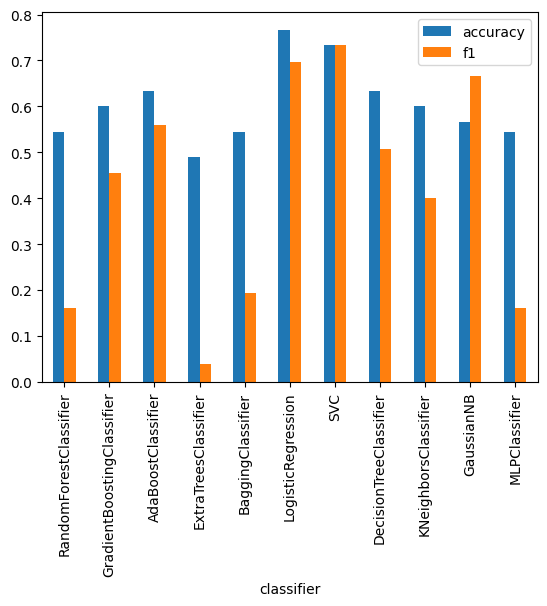

In [22]:
results_df.plot(x='classifier', y=['accuracy', 'f1'], kind='bar')

In [23]:
results_df = results_df.sort_values(by=['accuracy', 'f1'], ascending=False)
results_df

,classifier,accuracy,f1
5,LogisticRegression,0.766667,0.695652
6,SVC,0.733333,0.733333
2,AdaBoostClassifier,0.633333,0.560000
7,DecisionTreeClassifier,0.633333,0.507246
1,GradientBoostingClassifier,0.600000,0.454545
8,KNeighborsClassifier,0.600000,0.400000
9,GaussianNB,0.566667,0.666667
4,BaggingClassifier,0.544444,0.194172
0,RandomForestClassifier,0.544444,0.161765
10,MLPClassifier,0.544444,0.161765


Shuffling the data and training the models multiple times to get the average accuracy and f1 score.

In [27]:
results = {}
for i in range(5):
    random_state = fix_seed + i
    classifiers = get_classifiers(random_state=random_state)
    
    for classifier in classifiers:
        
        # shuffle the data
        financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=random_state)
        
        financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
        X = financial_dataset_flatten_preprocessed.drop('label', axis=1)
        y = financial_dataset_flatten_preprocessed['label']
        
        X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
        X_train = pd.concat([X_train, X_val])
        y_train = pd.concat([y_train, y_val])
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        classifier_name = classifier.__class__.__name__
        if classifier_name not in results:
            results[classifier_name] = [[accuracy, f1]]
        else:
            results[classifier_name].append([accuracy, f1])
            
results_mean = {k: np.mean(v, axis=0) for k, v in results.items()}
results_mean = [[k] + v.tolist() for k, v in results_mean.items()]
results_df = pd.DataFrame(results_mean, columns=['classifier', 'accuracy', 'f1'])

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.

<Axes: xlabel='classifier'>

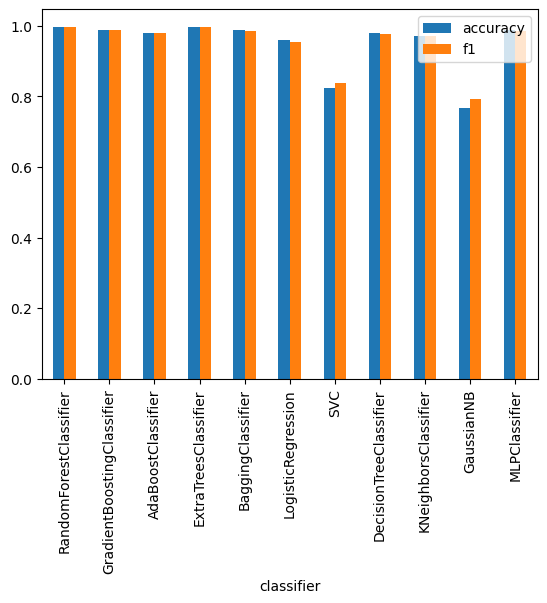

In [28]:
results_df.plot(x='classifier', y=['accuracy', 'f1'], kind='bar')

In [29]:
results_df = results_df.sort_values(by=['accuracy', 'f1'], ascending=False)
results_df

,classifier,accuracy,f1
3,ExtraTreesClassifier,0.996953,0.996685
0,RandomForestClassifier,0.996083,0.995764
1,GradientBoostingClassifier,0.988030,0.987135
4,BaggingClassifier,0.987595,0.986593
10,MLPClassifier,0.987378,0.986354
2,AdaBoostClassifier,0.980413,0.978923
7,DecisionTreeClassifier,0.978890,0.977112
8,KNeighborsClassifier,0.971708,0.970115
5,LogisticRegression,0.958651,0.954338
6,SVC,0.824810,0.838191


### Using TPOT auto ml to find best models

In [39]:
financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=fix_seed)

financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_flatten_preprocessed.drop('label', axis=1)
y = financial_dataset_flatten_preprocessed['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 85), (5197,), (919, 85), (919,))

In [40]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=fix_seed)
tpot.fit(X_train, y_train)

accuracy = tpot.score(X_test, y_test)
print(f"TPOTClassifier - Accuracy: {accuracy}")

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9857612719330717

Generation 2 - Current best internal CV score: 0.9886469978529652

Generation 3 - Current best internal CV score: 0.9886469978529652

Generation 4 - Current best internal CV score: 0.9886469978529652

Generation 5 - Current best internal CV score: 0.9886469978529652

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=9, max_features=0.7500000000000001, min_samples_leaf=19, min_samples_split=15, n_estimators=100, subsample=0.7000000000000001)
TPOTClassifier - Accuracy: 0.9967355821545157


In [41]:
tpot.export('tpot_pipeline_financial_model.py')

### Changing proportion of train and test data to exclude dataset strong correlation

In [50]:
financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=fix_seed + 2)

financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_flatten_preprocessed.drop(['label', 'subset'], axis=1)
y = financial_dataset_flatten_preprocessed['label']

split_ratio = 0.002
X_train, X_test = np.split(X, [int(split_ratio * len(X))])
y_train, y_test = np.split(y, [int(split_ratio * len(y))])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


((12, 85), (6104, 85), (12,), (6104,))

In [51]:
extraTreesClassifier = ExtraTreesClassifier(random_state=43, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

extraTreesClassifier.fit(X_train, y_train)

y_pred = extraTreesClassifier.predict(X_test)
        
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

accuracy: 0.7272280471821756
f1: 0.7150436419647441


In [52]:
mlpClassifier = MLPClassifier(hidden_layer_sizes=(16, 16),
                           batch_size='auto',
                           max_iter=300,
                           shuffle=False,
                           random_state=fix_seed,
                           early_stopping=True,
                           beta_2=0.99,
                           n_iter_no_change=20
)

mlpClassifier.fit(X_train, y_train)

y_pred = mlpClassifier.predict(X_test)
        
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

accuracy: 0.4695281782437746
f1: 0.6344547301874012


## TODO - finish

In [57]:
from tqdm import tqdm

experiment_count = 1
results = {}

train_test_split_ratios = [0.002, 0.01, 0.1, 0.2, 0.4, 0.8, 0.9, 0.99]

for split_ratio in train_test_split_ratios:
    
    for i in tqdm(range(experiment_count)):
        
        random_state = fix_seed + i
        financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=random_state)
    
        financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
        X = financial_dataset_flatten_preprocessed.drop(['label', 'subset'], axis=1)
        y = financial_dataset_flatten_preprocessed['label']
    
        X_train, X_test = np.split(X, [int(split_ratio * len(X))])
        y_train, y_test = np.split(y, [int(split_ratio * len(y))])
    
        extraTreesClassifier = ExtraTreesClassifier(random_state=random_state, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')
        
        mlpClassifier = MLPClassifier(hidden_layer_sizes=(16, 16),
                           batch_size='auto',
                           max_iter=300,
                           shuffle=False,
                           random_state=random_state,
                           early_stopping=True,
                           beta_2=0.99,
                           n_iter_no_change=20
        )
    
        classifiers = [extraTreesClassifier, mlpClassifier]
        
        for classifier in classifiers:
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
    
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
    
            classifier_name = classifier.__class__.__name__
            split_key = str(split_ratio).replace('.', '_')
            
            if split_key not in results:
                results[split_key] = {}
            if classifier_name not in results[split_key]:
                results[split_key][classifier_name] = []
                
            results[split_key][classifier_name].append([accuracy, f1])
                
results_mean = {k: {k2: np.mean(v2, axis=0) for k2, v2 in v.items()} for k, v in results.items()}
results_mean = {k: {k2: v2.tolist() for k2, v2 in v.items()} for k, v in results_mean.items()}
results_df = pd.DataFrame(results_mean)

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
  0%|          | 0/1 [00:00<?, ?it/s]


KeyError: '0_002'

In [55]:
results_df

,classifier,accuracy,f1
0,ExtraTreesClassifier,0.919019,0.925575
1,MLPClassifier,0.831936,0.849803


### Looking for the best hyperparameters of the best classifier - ExtraTreesClassifier

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

def create_model(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, random_state=42)
    return model

model = create_model()

param_distributions = {
    'n_estimators': [100],
    'min_samples_split': np.linspace(2, 6, 5).astype(int),
    'min_samples_leaf': np.linspace(2, 6, 5).astype(int),
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, cv=5, scoring='accuracy')

In [134]:
random_state = 43
financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=random_state)

financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_flatten_preprocessed.drop('label', axis=1)
y = financial_dataset_flatten_preprocessed['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)

In [135]:
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.989368 using {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'gini'}


Best: 0.989984 using {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'log_loss'}

Best: 0.988959 using {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'log_loss'}

Several attempts were made to find the best hyperparameters for the ExtraTreesClassifier model. The best hyperparameters are default values.

In [98]:
features = X_test.columns
importances = grid.best_estimator_.feature_importances_

Text(0, 0.5, 'Feature')

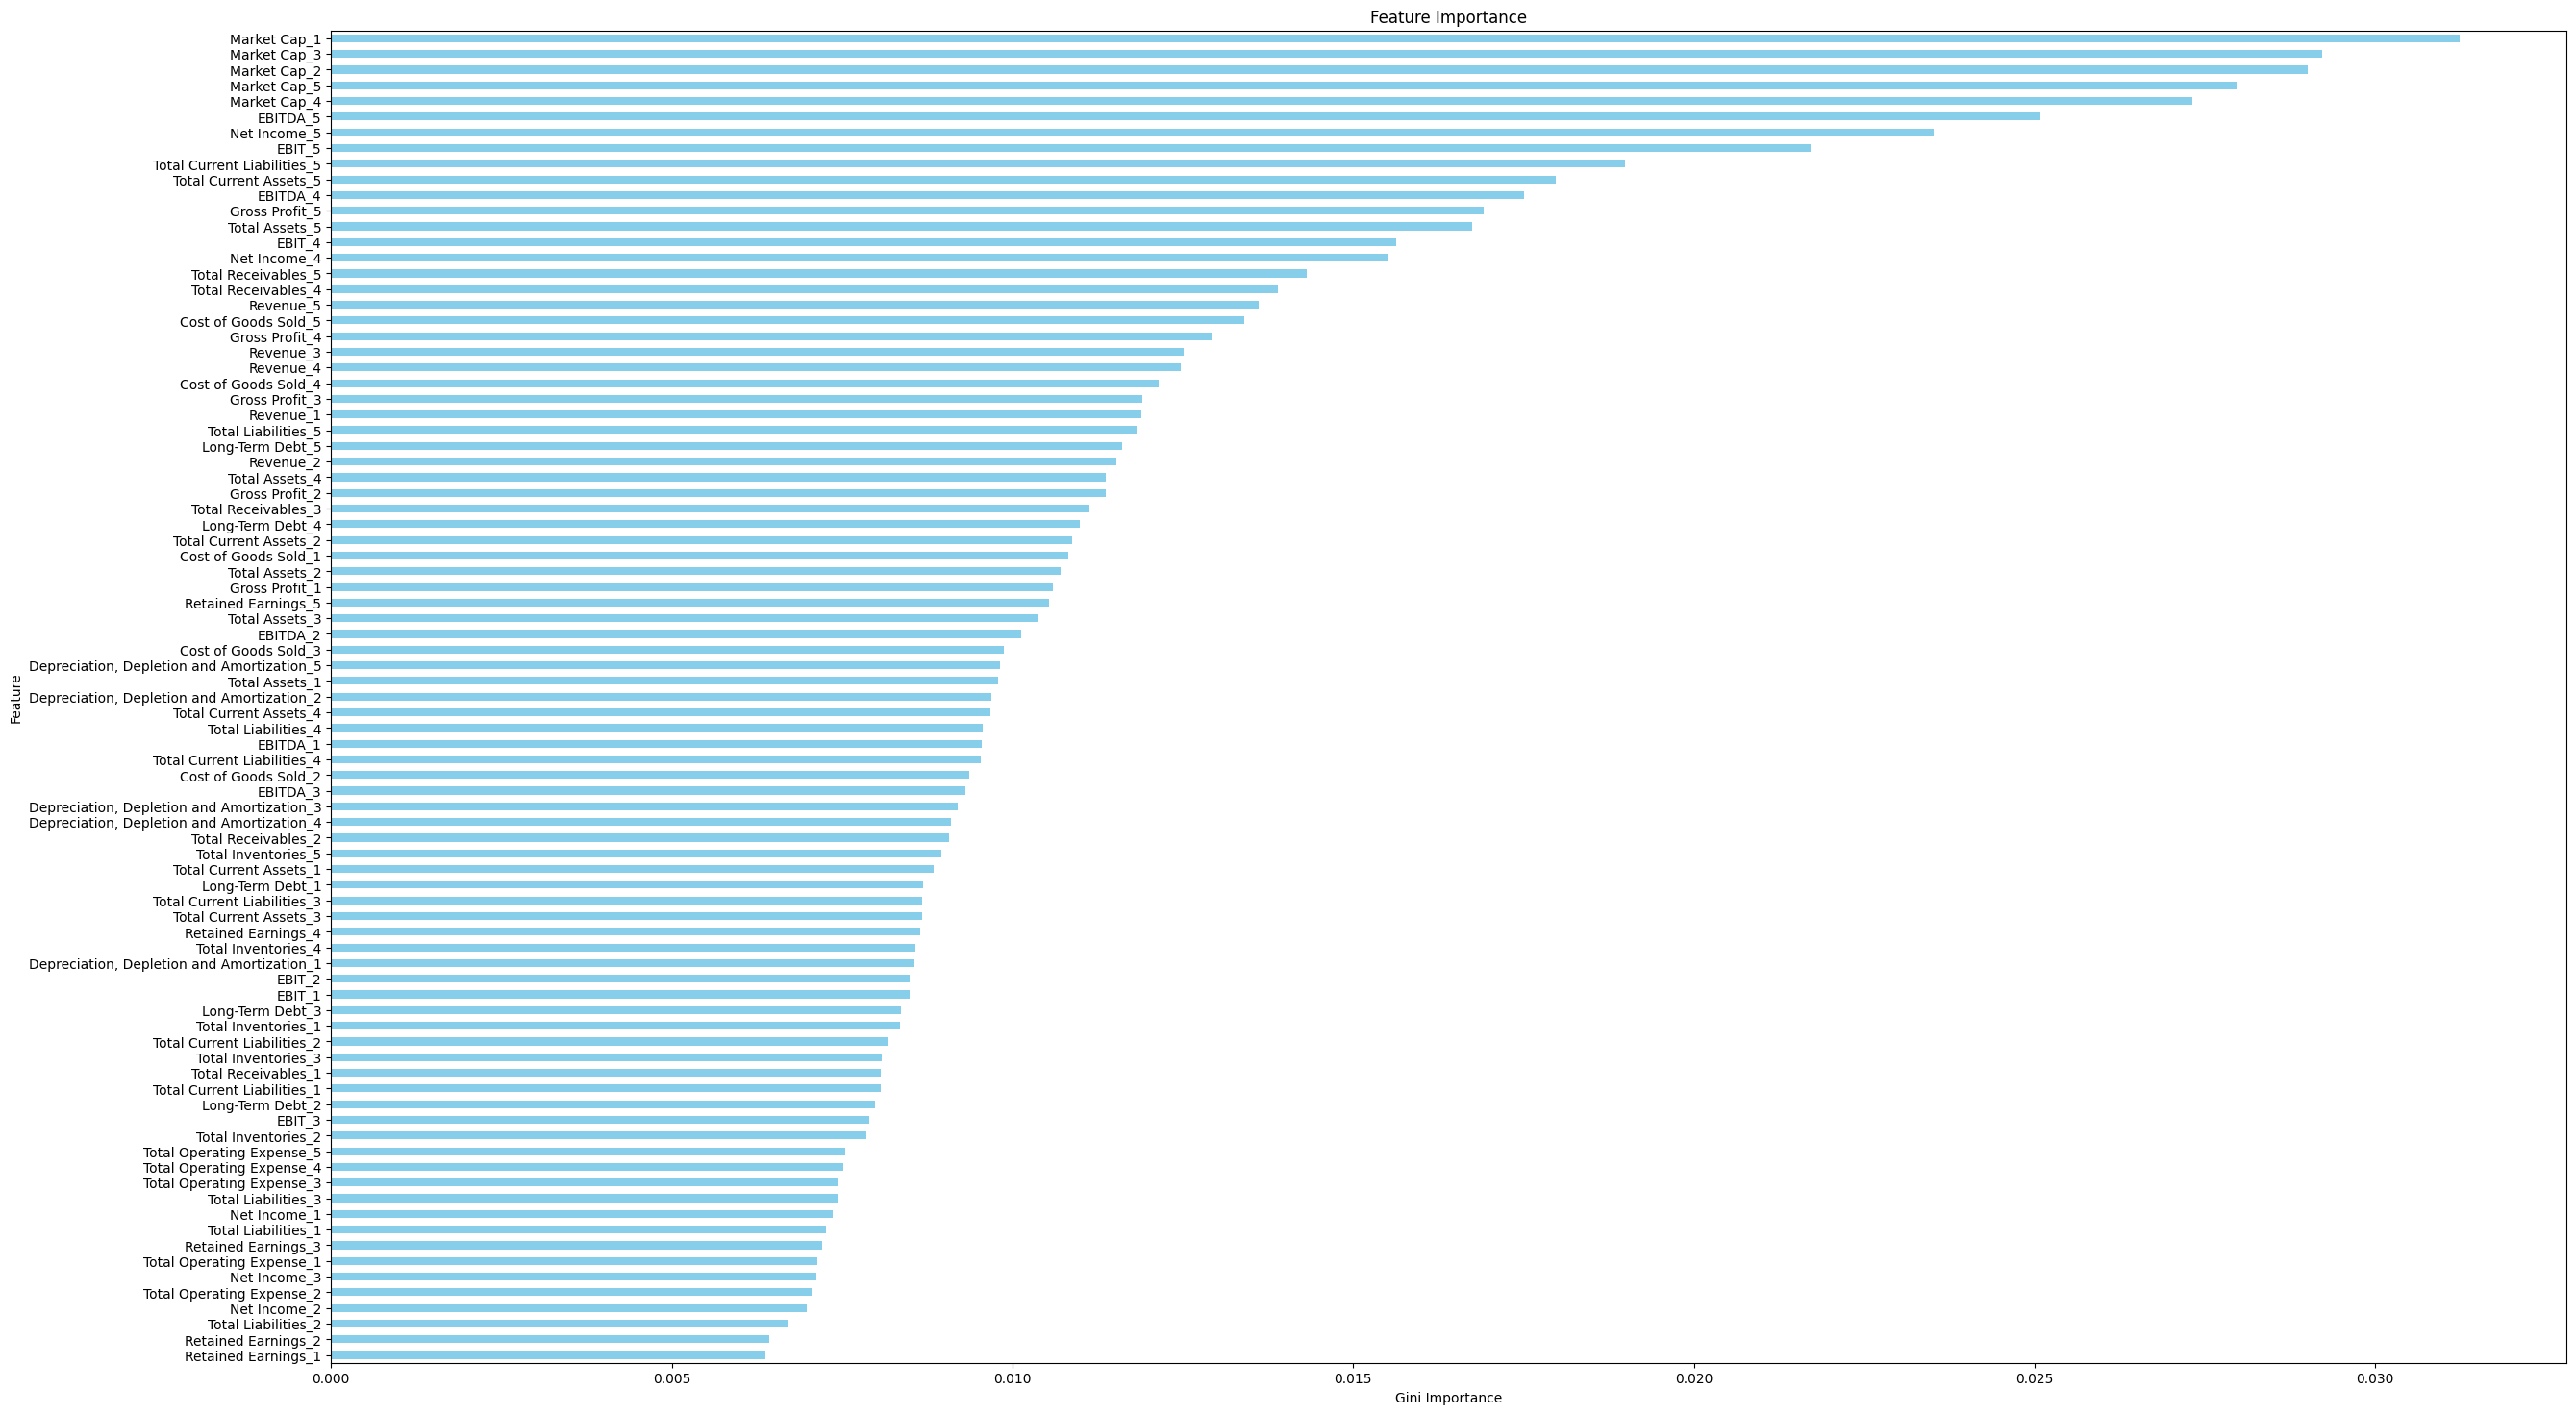

In [97]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.plot(kind= 'barh', figsize=(30, 18), color='skyblue', title='Feature Importance')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")

We can see that every feature is somehow important for the model.

In [136]:
extraTreesClassifier = ExtraTreesClassifier(random_state=43, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')
extraTreesClassifier.fit(X_train, y_train)

y_pred = extraTreesClassifier.predict(X_test)
        
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

accuracy: 0.9967355821545157
f1: 0.9964497041420118


accuracy: 0.9967355821545157
f1: 0.9964497041420118

In [129]:
extraTreesClassifier.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 43,
 'verbose': 0,
 'warm_start': False}

### PCA example on financial data

In [176]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [193]:
random_state = 43
financial_dataset_flatten = financial_dataset_flatten.sample(frac=1, random_state=random_state)

financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_flatten_preprocessed.drop(['label'], axis=1)
X = X.loc[:, X.columns != 'subset']
y = financial_dataset_flatten_preprocessed['label']

In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

components = pca.components_
print("Components:", components) 

Explained variance ratio: [0.66511504 0.08178156 0.05577536 0.04737364]
Components: [[ 0.10259507  0.10797243  0.10847256  0.12097041  0.12387657  0.07091382
   0.11751336  0.09892268  0.08671256  0.1160547   0.12342396  0.1142705
   0.11802085  0.08078858  0.10654024  0.1137231   0.10425534  0.10350375
   0.11073606  0.11150513  0.12142732  0.12573055  0.07165774  0.11469606
   0.10026113  0.08700486  0.11707894  0.12323697  0.11653986  0.11982836
   0.07586026  0.10857972  0.11449239  0.10513744  0.10359737  0.11154715
   0.11676225  0.1224993   0.12638733  0.07328472  0.11085118  0.1100914
   0.08609618  0.1174651   0.12352668  0.11414653  0.11839516  0.07561694
   0.11025521  0.11657039  0.10727944  0.10222873  0.1086468   0.11532676
   0.12297187  0.12468918  0.10694237  0.1039024   0.1064269   0.08524943
   0.11657588  0.12402204  0.11650071  0.11941186  0.07160442  0.12245956
   0.11691299  0.10565829  0.09719359  0.10436827  0.08957591  0.11275895
   0.12010167  0.10922435  0.0

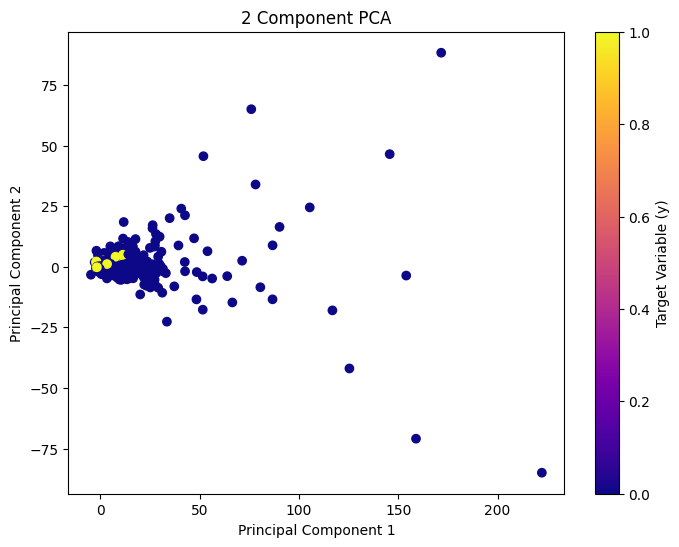

In [186]:
pca_df = pd.DataFrame(data=X_pca, columns=["principal component 1", "principal component 2"])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=y, cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.colorbar(label='Target Variable (y)')
plt.show()

In [195]:
X = financial_dataset_flatten_preprocessed.drop(['label'], axis=1)
X_train_pca, y_train_pca, X_val_pca, y_val_pca, X_test_pca, y_test_pca = get_train_val_test_split(X, y)

In [196]:
extraTreesClassifier = ExtraTreesClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

extraTreesClassifier.fit(X_train_pca, y_train_pca)
y_pred_pca = extraTreesClassifier.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)

print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

accuracy: 0.9967355821545157
f1: 0.9964497041420118


accuracy: 0.9967355821545157
f1: 0.9964497041420118

Getting the same results with and without PCA doesn't necessarily mean everything is alright. It can mean a few different things, and it's important to understand the nuances to interpret the results correctly:

Possible Scenarios and Interpretations

Your Features Are Already Uncorrelated: If your original features are already mostly uncorrelated (i.e., they don't share much information), then PCA won't find any new directions that significantly explain more variance than the original features. This is the most likely scenario if you're getting identical results.

Your Model is Robust to Redundant Features: Some models, like tree-based models (e.g., Random Forest, Gradient Boosting), are relatively insensitive to redundant or correlated features. They can effectively select the most important features during the training process, even if those features are highly correlated.

The Number of Components is Too High: If you're keeping too many principal components in your PCA transformation, you might be retaining most of the original information, leading to similar performance compared to using the original features.

Your Dataset is Small: In small datasets, the impact of PCA might be less noticeable. The added complexity of PCA might not be justified by the potential benefits of dimensionality reduction.

Should You Still Use PCA?

Even if you get the same results, there might still be reasons to consider using PCA:

Reduced Computational Cost: If you have a very high-dimensional dataset, using PCA to reduce dimensionality can significantly speed up your model training and prediction times.
Improved Interpretability (in some cases): If the first few principal components capture a significant portion of the variance, they might provide a more interpretable representation of your data than the original features.
Noise Reduction (potentially): PCA can help filter out some noise in your data, which could lead to slight improvements in model generalization, even if not immediately apparent in your initial results.
Recommendations:

Check Explained Variance Ratio: Examine how much of the total variance is explained by the first few principal components. If a small number of components explain most of the variance, then PCA could be beneficial.
Experiment with Number of Components: Try using different numbers of components and see if it impacts model performance.
Consider Model Complexity: If you're using a simple linear model, PCA might be more beneficial than if you're using a complex model that can already handle feature redundancy.
In conclusion:  Getting the same results with and without PCA doesn't necessarily indicate an error, but it does suggest that the impact of PCA on your specific problem might be limited. You should carefully evaluate the potential benefits of PCA in terms of computational efficiency, interpretability, and noise reduction before deciding whether to incorporate it into your workflow.

Let me know if you have any more questions!

### Textual Data

In [34]:
import torch
from tqdm import tqdm
from transformers import RobertaTokenizer, RobertaModel

In [42]:
def encode_roberta(dataset, use_cache=True):
    cache_directory = "../hybrid-model/data/bankrupt_companies_with_17_variables_5_years/textual_data/encoded_corpora/"
    cache_base_filename = "textual_data_encoded_ulti_representations"

    if use_cache:
        representations = np.load(f"{cache_directory}{cache_base_filename}.npy")
        representations_cls = np.load(f"{cache_directory}{cache_base_filename}_cls.npy")
        return representations, representations_cls

    if len(dataset) == 0 or dataset is None:
        raise ValueError("Dataset cannot be empty.")
    
    tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
    model = RobertaModel.from_pretrained("roberta-base")
    model.eval()

    print(f"Encoding {len(dataset)} articles...")

    all_representations = []
    all_representations_cls = []

    for article in tqdm(dataset):
        encoded = encode_article(article, tokenizer, model)
        all_representations.extend(encoded[0])
        all_representations_cls.extend(encoded[1])

    np.save(f"{cache_directory}{cache_base_filename}.npy", np.array(all_representations))
    np.save(f"{cache_directory}{cache_base_filename}_cls.npy", np.array(all_representations_cls))

    return np.array(all_representations), np.array(all_representations_cls)


def encode_article(article, tokenizer, model):
    tokenized_text = tokenizer.tokenize(article)

    chunk_size = 510
    chunks = [
        ["<s>"] +
        tokenized_text[i : i + chunk_size]
        + ["</s>"]
        for i in range(0, len(tokenized_text), chunk_size)
    ]

    with torch.no_grad():
        representations = []
        representations_cls = []
        for chunk in chunks:
            input_ids = tokenizer.convert_tokens_to_ids(chunk)
            input_tensor = torch.tensor([input_ids])
            encoded_layers = model(input_tensor)[0]
            output_hidden = encoded_layers.cpu().numpy()
            representations.append(np.mean(output_hidden[0], axis=0))
            representations_cls.append(output_hidden[0][0])

    if len(chunks) > 1:
        representations = [np.mean(representations, axis=0)]
        representations_cls = [np.mean(representations_cls, axis=0)]

    return representations, representations_cls

In [43]:
textual_data = pd.read_csv('textual_data_matched_split_version3.csv')
textual_data['text']

0       Chatham Lodging Trust is a REIT that invests i...
1       A cooperative bankshares corporation.  The com...
2       Wind River, a global leader in Device Software...
3       - Reported a 20% increase in revenue, driven b...
4       Landstar System, Inc. is an asset-light provid...
                              ...                        
7209    The company is an integrated media company foc...
7210    Despite revenue of $411.4 million, the company...
7211    PCS Vision, which offers faster data speeds, w...
7212    There is a high seasonality in demand in the c...
7213    The company is a leading provider of cloud-bas...
Name: text, Length: 7214, dtype: object

In [44]:
representations, representations_cls = encode_roberta(textual_data['text'], use_cache=False)

X = representations
y = textual_data['label'].values

representations.shape, representations_cls.shape, y.shape

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Encoding 7214 articles...


100%|██████████| 7214/7214 [35:37<00:00,  3.37it/s]  


((7214, 768), (7214, 768), (7214,))

In [13]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1) 

dataset = TensorDataset(X, y)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-

In [15]:
batch_size = 128

In [5]:
def get_train_val_test_loaders(dataset, batch_size, train_ratio=0.8, val_ratio=0.05):
    dataset_length = len(dataset)
    train_size = int(train_ratio * dataset_length)
    val_size = int(val_ratio * dataset_length)
    test_size = dataset_length - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    test_loader = DataLoader(test_dataset, shuffle=False)
    
    return train_loader, val_loader, test_loader

In [17]:
train_loader, val_loader, test_loader = get_train_val_test_loaders(dataset, batch_size)

len(train_loader), len(val_loader), len(test_loader), batch_size*(len(train_loader) + len(val_loader)) + len(test_loader)

(38, 2, 919, 6039)

In [119]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf
        self.delta = delta

    def __call__(self, val_loss, model, path, checkpoint_path='checkpoint.pth'):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path, checkpoint_path)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'\nEarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model, path, checkpoint_path)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, path, checkpoint_path):
        if self.verbose:
            print(f'\nValidation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), f'{path}/{checkpoint_path}')
        self.val_loss_min = val_loss

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPWithDropout(nn.Module):
    def __init__(self, input_size):
        super(MLPWithDropout, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 64, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.05),
            nn.Linear(64, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, 1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear(x)

In [186]:
input_size = 768
learning_rate = 0.001
num_epochs = 50
patience = 6

mlp = MLPWithDropout(input_size)

criterion = nn.BCELoss()
optimizer = optim.AdamW(mlp.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5)
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [187]:
for epoch in range(num_epochs):
    mlp.train()
    train_loss = 0.0
    
    for inputs, targets in train_loader:
        outputs = mlp(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)  # Accumulate loss over batches
    
    scheduler.step()
    
    # validate the model
    mlp.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = mlp(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)


            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    
    path = './hybrid-model-search/checkpoints/'
    early_stopping(val_loss, mlp, path)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.2f}%, LR: {scheduler.get_last_lr()}')


Validation loss decreased (inf --> 0.445400).  Saving model ...
Epoch [1/50], Train Loss: 0.6331, Val Loss: 0.4454, Val Accuracy: 87.11%, LR: [0.001]

Validation loss decreased (0.445400 --> 0.195147).  Saving model ...
Epoch [2/50], Train Loss: 0.3961, Val Loss: 0.1951, Val Accuracy: 93.36%, LR: [0.001]

Validation loss decreased (0.195147 --> 0.117114).  Saving model ...
Epoch [3/50], Train Loss: 0.2141, Val Loss: 0.1171, Val Accuracy: 94.92%, LR: [0.001]

Validation loss decreased (0.117114 --> 0.109553).  Saving model ...
Epoch [4/50], Train Loss: 0.1729, Val Loss: 0.1096, Val Accuracy: 94.92%, LR: [0.001]

Validation loss decreased (0.109553 --> 0.106245).  Saving model ...
Epoch [5/50], Train Loss: 0.1528, Val Loss: 0.1062, Val Accuracy: 95.70%, LR: [0.001]

Validation loss decreased (0.106245 --> 0.103841).  Saving model ...
Epoch [6/50], Train Loss: 0.1420, Val Loss: 0.1038, Val Accuracy: 95.70%, LR: [0.0005]

Validation loss decreased (0.103841 --> 0.097584).  Saving model ..

In [188]:
mlp.load_state_dict(torch.load(path + 'checkpoint.pth'))
mlp.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = mlp(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 94.78%


best (without early stopping, 20 epochs, lr: 0.001, 6 layers):
Test Accuracy: 95.76%

### Different way of texts encoding - embedding per sentence

Encoding sentences with RoBERTa model

In [1]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import numpy as np
from tqdm import tqdm
import pandas as pd

In [162]:
def pad_3d_array(array, textual_data_encoding_size, fill_value=0):
    max_sentences = max(len(arr) for arr in array)

    padded_array = []
    for arr in array:
        num_sentences = len(arr)
        padding_shape = (max_sentences - num_sentences, textual_data_encoding_size)
        padding = np.full(padding_shape, fill_value) 
        padded_arr = np.concatenate([arr, padding], axis=0)
        padded_array.append(padded_arr)

    return np.array(padded_array)


def encode_roberta_per_sentence(dataset, use_cache=True):
    cache_directory = "../hybrid-model/data/bankrupt_companies_with_17_variables_5_years/textual_data/encoded_corpora_per_sentence/"
    cache_base_filename = "textual_data_encoded_ulti_representations"

    if use_cache:
        representations = np.load(f"{cache_directory}{cache_base_filename}.npy")
        representations_cls = np.load(f"{cache_directory}{cache_base_filename}_cls.npy")
        return representations, representations_cls

    if dataset is None:
        raise ValueError("Dataset cannot be empty.")
    
    tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
    model = RobertaModel.from_pretrained("roberta-base")
    model.eval()

    print(f"Encoding {len(dataset)} articles...")

    all_representations = []
    all_representations_cls = []

    for article in tqdm(dataset):
        encoded = encode_article_per_sentence(article, tokenizer, model)
        all_representations.append(encoded[0])
        all_representations_cls.append(encoded[1])
        
    
    textual_data_encoding_size = 768
    all_representations_padded = pad_3d_array(all_representations, textual_data_encoding_size)
    all_representations_cls_padded = pad_3d_array(all_representations_cls, textual_data_encoding_size)
    
    # for idx, doc in enumerate(all_representations_cls):
    #     if len(doc) <= max_len:
    #         pos[idx][:doc.shape[0], :] = doc
    #     else:
    #         pos[idx][:max_len, :] = doc[:max_len, :]

    np.save(f"{cache_directory}{cache_base_filename}.npy", all_representations_padded)
    np.save(f"{cache_directory}{cache_base_filename}_cls.npy", all_representations_cls_padded)

    return all_representations_padded, all_representations_cls_padded


def encode_article_per_sentence(article, tokenizer, model):
    chunks = [
        ["<s>"] + tokenizer.tokenize(sentence) + ["</s>"]
        for sentence in split_text_by_sentences(article)
    ]

    with torch.no_grad():
        representations = []
        representations_cls = []
        for chunk in chunks:
            input_ids = tokenizer.convert_tokens_to_ids(chunk)
            input_tensor = torch.tensor([input_ids])
            encoded_layers = model(input_tensor)[0]
            output_hidden = encoded_layers.cpu().numpy()
            representations.append(np.mean(output_hidden[0], axis=0))
            representations_cls.append(output_hidden[0][0])

    return representations, representations_cls


def split_text_by_sentences(text, max_chars_per_chunk=500):

    chunks = []
    current_chunk = ""
    start_index = 0
    
    for i, word in enumerate(text.split()):
        current_chunk += word + " "
    
        if len(current_chunk) > max_chars_per_chunk:
            chunks.append(text[start_index:i])
            start_index = i + 1
            current_chunk = ""
        elif word.endswith("."):
            chunks.append(current_chunk)
            start_index = i + 1
            current_chunk = ""
        
    if current_chunk:
        chunks.append(text[start_index:])
    
    return chunks

In [163]:
textual_data = pd.read_csv('textual_data-matched_and_aligned_with_fin_data-split.csv')

representations, representations_cls = encode_roberta_per_sentence(textual_data['text'], use_cache=True)
representations.shape, representations_cls.shape

((6116, 28, 768), (6116, 28, 768))

In [164]:
print(f'Non zeros values in dataset: {(np.count_nonzero(representations) / representations.size):.2f}%')

Non zeros values in dataset: 0.42%


In [165]:
X = representations
X = X.reshape(X.shape[0], -1)
y = textual_data['label'].values
X.shape, y.shape

((6116, 21504), (6116,))

In [166]:
X = torch.tensor(X, dtype=torch.float32).clone().detach()
y = torch.tensor(y, dtype=torch.float32).view(-1, 1).clone().detach()

dataset = TensorDataset(X, y)

In [167]:
train_loader, val_loader, test_loader = get_train_val_test_loaders(dataset, batch_size)

len(train_loader), len(val_loader), len(test_loader), batch_size*(len(train_loader) + len(val_loader)) + len(test_loader)

(38, 2, 919, 6039)

MLP for different way of encoding

In [168]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPWithDropoutSentenceLevel(nn.Module):
    def __init__(self, input_size):
        super(MLPWithDropoutSentenceLevel, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 768, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(768, 256, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(256, 128, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(128, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, 1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear(x)

In [169]:
input_size = X.shape[1]
learning_rate = 0.001
num_epochs = 15
patience = 3

mlpSentenceLevel = MLPWithDropoutSentenceLevel(input_size)
criterion = nn.BCELoss()
optimizer = optim.AdamW(mlpSentenceLevel.parameters(), lr=learning_rate)

early_stopping = EarlyStopping(patience=patience, verbose=True)

In [170]:
for epoch in range(num_epochs):
    mlpSentenceLevel.train()
    train_loss = 0.0
    
    for inputs, targets in train_loader:
        outputs = mlpSentenceLevel(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)  # Accumulate loss over batches
    
    # validate the model
    mlpSentenceLevel.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = mlpSentenceLevel(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    
    path = './hybrid-model-search/checkpoints/'
    early_stopping(val_loss, mlpSentenceLevel, path)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.2f}%')

KeyboardInterrupt: 

In [54]:
mlpSentenceLevel.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = mlpSentenceLevel(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 94.23%


Aggregating the sentence-level embeddings with attention

In [142]:
X = representations
y = textual_data['label'].values
X.shape, y.shape

((6116, 28, 768), (6116,))

In [143]:
X = torch.tensor(X, dtype=torch.float32).clone().detach()
y = torch.tensor(y, dtype=torch.float32).view(-1, 1).clone().detach()

dataset = TensorDataset(X, y)

In [144]:
train_loader, val_loader, test_loader = get_train_val_test_loaders(dataset, batch_size)

len(train_loader), len(val_loader), len(test_loader), batch_size*(len(train_loader) + len(val_loader)) + len(test_loader)

(38, 2, 919, 6039)

In [260]:
from torch.optim import lr_scheduler 

class TextClassifierWithAttention(nn.Module):
    def __init__(self, input_size, num_heads=4):
        super().__init__()
        self.attention = nn.MultiheadAttention(input_size, num_heads=num_heads)
        self.classifier = nn.Sequential(
            nn.Linear(input_size, 768),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(128, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, sentence_embeddings):
        text_embedding, _ = self.attention(sentence_embeddings, sentence_embeddings, sentence_embeddings)
        text_embedding = text_embedding[:, 0, :]  # Take the output for the first token (CLS)

        out = self.classifier(text_embedding)
        return out

# Example usage
input_size = 768
learning_rate = 0.002
num_epochs = 30
patience = 5

textClassifierWithAttention = TextClassifierWithAttention(input_size)

criterion = nn.BCELoss()
optimizer = optim.AdamW(textClassifierWithAttention.parameters(), lr=learning_rate, weight_decay=0.01)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [261]:
for epoch in range(num_epochs):
    textClassifierWithAttention.train()
    train_loss = 0.0
    
    for inputs, targets in train_loader:
        outputs = textClassifierWithAttention(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)  # Accumulate loss over batches
    
    scheduler.step()
    
    # validate the model
    textClassifierWithAttention.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = textClassifierWithAttention(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    
    path = './hybrid-model-search-mlp-with-attention/checkpoints/'
    early_stopping(val_loss, textClassifierWithAttention, path)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.2f}%, lr: {optimizer.param_groups[0]["lr"]}')


Validation loss decreased (inf --> 0.464572).  Saving model ...
Epoch [1/30], Train Loss: 0.6585, Val Loss: 0.4646, Val Accuracy: 78.12%, lr: 0.002

Validation loss decreased (0.464572 --> 0.322849).  Saving model ...
Epoch [2/30], Train Loss: 0.4975, Val Loss: 0.3228, Val Accuracy: 83.59%, lr: 0.002

Validation loss decreased (0.322849 --> 0.310898).  Saving model ...
Epoch [3/30], Train Loss: 0.3951, Val Loss: 0.3109, Val Accuracy: 83.98%, lr: 0.002

Validation loss decreased (0.310898 --> 0.295128).  Saving model ...
Epoch [4/30], Train Loss: 0.3673, Val Loss: 0.2951, Val Accuracy: 85.94%, lr: 0.002

Validation loss decreased (0.295128 --> 0.280284).  Saving model ...
Epoch [5/30], Train Loss: 0.3312, Val Loss: 0.2803, Val Accuracy: 83.98%, lr: 0.001

Validation loss decreased (0.280284 --> 0.269117).  Saving model ...
Epoch [6/30], Train Loss: 0.3044, Val Loss: 0.2691, Val Accuracy: 85.55%, lr: 0.001

EarlyStopping counter: 1 out of 5
Epoch [7/30], Train Loss: 0.2795, Val Loss: 0.

In [262]:
textClassifierWithAttention.load_state_dict(torch.load(path + 'checkpoint.pth'))
textClassifierWithAttention.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = textClassifierWithAttention(inputs)
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 52.88%


Test Accuracy: 60.00%

Test Accuracy: 53.21%

### DistilRoberta-financial-sentiment pretrained model

In [3]:
import torch

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet\venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\grzeg\.cache\huggingface\hub\models--mrm8488--distilroberta-finetuned-financial-news-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

In [24]:
# example_sentence = "The company's revenue is increasing and the stock price is going up."
example_sentence = "The company's is stable, but recently has law problems."

inputs = tokenizer(example_sentence, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'neutral'

In [33]:
softmax = torch.nn.Sigmoid()

In [34]:
with torch.no_grad():
    print(softmax(model(**inputs).logits))

tensor([[0.5846, 0.9230, 0.0817]])


### Hybrid Model - stack several models

#### Prepare data loader for both datasets

In [6]:
import numpy as np
import pandas as pd

In [7]:
batch_size = 128

In [11]:
financial_dataset = pd.read_csv('bankrupt_companies-17_variables-5_years_per_object-balanced-split-matched_with_textual_data-shuffled.csv')
financial_dataset_flatten = flatten_financial_dataset(financial_dataset)
financial_dataset_flatten_preprocessed = financial_dataset_flatten.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)

X_financial = financial_dataset_flatten_preprocessed.drop(['label', 'subset'], axis=1)
y_financial = financial_dataset_flatten_preprocessed['label']

In [15]:
textual_dataset = pd.read_csv('textual_data-matched_and_aligned_with_fin_data-split.csv')
representations, representations_cls = encode_roberta(textual_dataset['text'], use_cache=True)
X_textual = representations
y_textual = textual_dataset['label'].values

representations.shape, representations_cls.shape, y_textual.shape

((6116, 768), (6116, 768), (6116,))

In [16]:
assert len(X_financial) == len(X_textual), "Mismatch between the number of financial and textual samples."
assert np.array_equal(y_financial.values, y_textual), "Mismatch between the labels of financial and textual datasets."

In [17]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

X_financial_tensor = torch.tensor(X_financial.values, dtype=torch.float32)
X_textual_tensor = torch.tensor(X_textual, dtype=torch.float32)
y_tensor = torch.tensor(y_financial.values, dtype=torch.float32).view(-1, 1)

financial_scaler = StandardScaler()
X_financial_standardized = financial_scaler.fit_transform(X_financial_tensor.numpy())
X_financial_tensor_standardized = torch.tensor(X_financial_standardized, dtype=torch.float32)

# Combine the standardized financial data with the textual data
combined_dataset = TensorDataset(X_financial_tensor_standardized, X_textual_tensor, y_tensor)

In [18]:
train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)

len(train_loader), len(val_loader), len(test_loader), batch_size*(len(train_loader) + len(val_loader)) + len(test_loader)

(38, 2, 919, 6039)

#### Best model for financial data

In [16]:
import torch
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score
import pickle

In [17]:
extraTreesClassifier = ExtraTreesClassifier(random_state=43, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

# training
X_train_financial = X_financial_tensor[train_loader.dataset.indices]
y_train = y_tensor[train_loader.dataset.indices].reshape(-1)

extraTreesClassifier.fit(X_train_financial, y_train)

# testing
X_test_financial = X_financial_tensor[test_loader.dataset.indices]
y_test = y_tensor[test_loader.dataset.indices].reshape(-1)

y_pred = extraTreesClassifier.predict(X_test_financial)

# metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

extra_trees_classifier_path = './hybrid-model-search/extra-trees-classifier'
with open(f'{extra_trees_classifier_path}/model.pkl','wb') as f:
    pickle.dump(extraTreesClassifier, f)

accuracy: 0.9902067464635473
f1: 0.9897610921501706


#### Best model for textual data

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


class MLPWithDropoutSoftmaxOutput(nn.Module):
    def __init__(self, input_size):
        super(MLPWithDropoutSoftmaxOutput, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 64, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.05),
            nn.Linear(64, 16, bias=True),
            nn.ReLU(),
            nn.Linear(16, 2, bias=True),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.linear(x)

In [112]:
input_size = 768
learning_rate = 0.001
num_epochs = 50
patience = 6

mlp = MLPWithDropoutSoftmaxOutput(input_size)

criterion = nn.BCELoss()
optimizer = optim.AdamW(mlp.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5)
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [77]:
for epoch in range(num_epochs):
    mlp.train()
    train_loss = 0.0
    
    for _, inputs_textual, targets in train_loader:
        outputs = mlp(inputs_textual)
        targets_one_hot_encoded = torch.nn.functional.one_hot(targets.to(torch.int64)).to(torch.float32).squeeze(1)
        loss = criterion(outputs, targets_one_hot_encoded)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs_textual.size(0)  # Accumulate loss over batches
    
    scheduler.step()
    
    # validate the model
    mlp.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for _, inputs_textual, targets in val_loader:
            outputs = mlp(inputs_textual)
            targets_one_hot_encoded = torch.nn.functional.one_hot(targets.to(torch.int64)).to(torch.float32).squeeze(1)
            loss = criterion(outputs, targets_one_hot_encoded)
            val_loss += loss.item() * inputs_textual.size(0)

            predicted_labels = torch.argmax(outputs, dim=1)
            total += targets.size(0)
            correct += (predicted_labels == targets.squeeze(1)).sum().item()


    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    
    mlp_with_dropout_softmax_output_path = './hybrid-model-search/mlp-with-dropout-softmax-output/'
    early_stopping(val_loss, mlp, mlp_with_dropout_softmax_output_path)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.2f}%, LR: {scheduler.get_last_lr()}')


Validation loss decreased (inf --> 0.478476).  Saving model ...
Epoch [1/50], Train Loss: 0.6390, Val Loss: 0.4785, Val Accuracy: 76.17%, LR: [0.001]

Validation loss decreased (0.478476 --> 0.260284).  Saving model ...
Epoch [2/50], Train Loss: 0.3789, Val Loss: 0.2603, Val Accuracy: 87.50%, LR: [0.001]

Validation loss decreased (0.260284 --> 0.219219).  Saving model ...
Epoch [3/50], Train Loss: 0.1982, Val Loss: 0.2192, Val Accuracy: 88.28%, LR: [0.001]

Validation loss decreased (0.219219 --> 0.195770).  Saving model ...
Epoch [4/50], Train Loss: 0.1663, Val Loss: 0.1958, Val Accuracy: 90.23%, LR: [0.001]

Validation loss decreased (0.195770 --> 0.173434).  Saving model ...
Epoch [5/50], Train Loss: 0.1485, Val Loss: 0.1734, Val Accuracy: 91.41%, LR: [0.001]

Validation loss decreased (0.173434 --> 0.159001).  Saving model ...
Epoch [6/50], Train Loss: 0.1430, Val Loss: 0.1590, Val Accuracy: 92.19%, LR: [0.0005]

Validation loss decreased (0.159001 --> 0.156030).  Saving model ..

In [79]:
mlp.load_state_dict(torch.load(mlp_with_dropout_softmax_output_path + 'checkpoint.pth'))
mlp.eval()
correct = 0
total = 0

with torch.no_grad():
    for _, inputs_textual, targets in test_loader:
        outputs = mlp(inputs_textual)
        predicted_labels = torch.argmax(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted_labels == targets.squeeze(1)).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 94.56%


Testing hybrid model

In [111]:
with open(f'{extra_trees_classifier_path}/model.pkl', 'rb') as f:
    extraTreesClassifier = pickle.load(f)
    
mlp.load_state_dict(torch.load(mlp_with_dropout_softmax_output_path + 'checkpoint.pth'))
mlp.eval()

models_weights = {
    'financial': 0.7,
    'textual': 0.3
}

correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for X_financial_data, X_textual_data, targets in test_loader:

        financial_outputs = extraTreesClassifier.predict_proba(X_financial_data)
        textual_outputs = mlp(X_textual_data)
        
        financial_outputs = models_weights['financial'] * financial_outputs.squeeze(0)
        textual_outputs = models_weights['textual'] * textual_outputs.squeeze(0)
        
        outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
        predicted_label = np.argmax(outputs)
        
        y_true.append(int(targets.item()))
        y_pred.append(predicted_label)
        
        total += 1
        correct += (predicted_label == int(targets.item()))
    
accuracy = correct / total
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy:.3f}')
print(f'f1: {f1:.3f}')

accuracy: 0.995
f1: 0.994


ExtraTreesClassifier results: accuracy: 0.992, f1: 0.992

MLPWithDropoutSoftmaxOutput results: accuracy: 0.945, f1: 0.941

Hybrid model results with weighting models decisions: accuracy: 0.995, f1: 0.994

Looking for best weights for the models decisions

In [91]:
models_weights_configuration = {
    'financial': np.linspace(0.0, 1.0, 11),
    'textual': np.linspace(1.0, 0.0, 11)
}

In [92]:
with open(f'{extra_trees_classifier_path}/model.pkl', 'rb') as f:
    extraTreesClassifier = pickle.load(f)
    
mlp.load_state_dict(torch.load(mlp_with_dropout_softmax_output_path + 'checkpoint.pth'))
mlp.eval()

accuracies = []
f1s = []

with torch.no_grad():
    for financial_model_weight, textual_model_weight in tqdm(zip(models_weights_configuration['financial'], models_weights_configuration['textual'])):

        correct = 0
        total = 0
        y_true = []
        y_pred = []

        for X_financial_data, X_textual_data, targets in test_loader:

            financial_outputs = extraTreesClassifier.predict_proba(X_financial_data)
            textual_outputs = mlp(X_textual_data)
            
            financial_outputs = financial_model_weight * financial_outputs.squeeze(0)
            textual_outputs = textual_model_weight * textual_outputs.squeeze(0)

            outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
            predicted_label = np.argmax(outputs)

            y_true.append(int(targets.item()))
            y_pred.append(predicted_label)

            total += 1
            correct += (predicted_label == int(targets.item()))
    
        accuracy = correct / total
        f1 = f1_score(y_test, y_pred)
        
        accuracies.append(accuracy)
        f1s.append(f1)

11it [00:47,  4.31s/it]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(models_weights_configuration['financial'], accuracies, label='accuracy')
plt.plot(models_weights_configuration['financial'], f1s, label='f1')
plt.xlabel('Financial model weight')
plt.ylabel('Metric value')
plt.title('Metrics values against Financial model decision weight')
plt.legend()
plt.show()

It can be seen that accuracy reaches the highest value when the financial model weight is set to 1.0 and the textual model weight is set to 0.0. This means that the textual model generates worse decisions than the financial model.

Checking more configurations around the best one

In [102]:
models_weights_configuration = {
    'financial': np.linspace(0.5, 0.9, 9),
    'textual': np.linspace(0.5, 0.1, 9)
}

models_weights_configuration

{'financial': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 'textual': array([0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 ])}

In [103]:
with open(f'{extra_trees_classifier_path}/model.pkl', 'rb') as f:
    extraTreesClassifier = pickle.load(f)
    
mlp.load_state_dict(torch.load(mlp_with_dropout_softmax_output_path + 'checkpoint.pth'))
mlp.eval()

accuracies = []
f1s = []

with torch.no_grad():
    for financial_model_weight, textual_model_weight in tqdm(zip(models_weights_configuration['financial'], models_weights_configuration['textual'])):

        correct = 0
        total = 0
        y_true = []
        y_pred = []

        for X_financial_data, X_textual_data, targets in test_loader:

            financial_outputs = extraTreesClassifier.predict_proba(X_financial_data)
            textual_outputs = mlp(X_textual_data)
            
            financial_outputs = financial_model_weight * financial_outputs.squeeze(0)
            textual_outputs = textual_model_weight * textual_outputs.squeeze(0)

            outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
            predicted_label = np.argmax(outputs)

            y_true.append(int(targets.item()))
            y_pred.append(predicted_label)

            total += 1
            correct += (predicted_label == int(targets.item()))
    
        accuracy = correct / total
        f1 = f1_score(y_test, y_pred)
        
        accuracies.append(accuracy)
        f1s.append(f1)

9it [00:47,  5.25s/it]


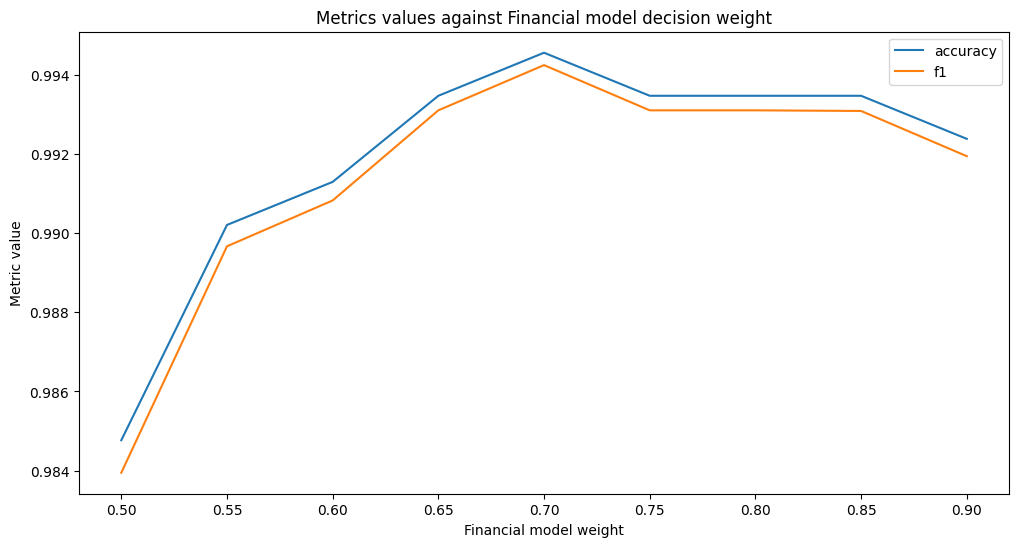

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(models_weights_configuration['financial'], accuracies, label='accuracy')
plt.plot(models_weights_configuration['financial'], f1s, label='f1')
plt.xlabel('Financial model weight')
plt.ylabel('Metric value')
plt.title('Metrics values against Financial model decision weight')
plt.legend()
plt.show()

In [105]:
best_configuration = np.argmax(accuracies)
best_configuration, accuracies[best_configuration], f1s[best_configuration]

(4, 0.9945593035908596, 0.9942462600690449)

In [106]:
models_weights_configuration['financial'][best_configuration], models_weights_configuration['textual'][best_configuration]

(0.7, 0.3)

### Repeating the process for statistical significance

In [135]:
experiments_count = 10

experiments_accuracies = []
experiments_f1s = []

for i in tqdm(range(experiments_count)):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    ### training financial model ###
    extraTreesClassifier = ExtraTreesClassifier(random_state=fix_seed, criterion='gini', max_depth=None,
                                                min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

    train_indices = train_loader.dataset.indices
    X_train_financial = X_financial_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    extraTreesClassifier.fit(X_train_financial, y_train)
    
    extra_trees_classifier_path = './hybrid-model-search/extra-trees-classifier'
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl','wb') as f:
        pickle.dump(extraTreesClassifier, f)
    
    ### training textual model ###
    input_size = 768
    learning_rate = 0.001
    num_epochs = 50
    patience = 6
    
    mlp = MLPWithDropoutSoftmaxOutput(input_size)
    
    criterion = nn.BCELoss()
    optimizer = optim.AdamW(mlp.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5)
    early_stopping = EarlyStopping(patience=patience, verbose=False)
    
    for epoch in range(num_epochs):
        mlp.train()
        train_loss = 0.0
        
        for _, inputs_textual, targets in train_loader:
            outputs = mlp(inputs_textual)
            targets_one_hot_encoded = torch.nn.functional.one_hot(targets.to(torch.int64)).to(torch.float32).squeeze(1)
            loss = criterion(outputs, targets_one_hot_encoded)
    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs_textual.size(0)
        
        scheduler.step()
        
        # validate the model
        mlp.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for _, inputs_textual, targets in val_loader:
                outputs = mlp(inputs_textual)
                targets_one_hot_encoded = torch.nn.functional.one_hot(targets.to(torch.int64)).to(torch.float32).squeeze(1)
                loss = criterion(outputs, targets_one_hot_encoded)
                val_loss += loss.item() * inputs_textual.size(0)
    
                predicted_labels = torch.argmax(outputs, dim=1)
                total += targets.size(0)
                correct += (predicted_labels == targets.squeeze(1)).sum().item()
    
        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)
        accuracy = 100 * correct / total
        
        mlp_with_dropout_softmax_output_path = './hybrid-model-search/mlp-with-dropout-softmax-output/'
        early_stopping(val_loss, mlp, mlp_with_dropout_softmax_output_path, checkpoint_path=f'checkpoint-{i+1}.pth')
        if early_stopping.early_stop:
            break
    
    # testing hybrid model
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        extraTreesClassifier = pickle.load(f)
    
    mlp.load_state_dict(torch.load(mlp_with_dropout_softmax_output_path + f'checkpoint-{i+1}.pth'))
    mlp.eval()
    
    models_weights = {
        'financial': 0.7,
        'textual': 0.3
    }
    
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for X_financial_data, X_textual_data, targets in test_loader:
    
            financial_outputs = extraTreesClassifier.predict_proba(X_financial_data)
            textual_outputs = mlp(X_textual_data)
            
            financial_outputs = models_weights['financial'] * financial_outputs.squeeze(0)
            textual_outputs = models_weights['textual'] * textual_outputs.squeeze(0)
            
            outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
            predicted_label = np.argmax(outputs)
            
            y_true.append(int(targets.item()))
            y_pred.append(predicted_label)
            
            total += 1
            correct += (predicted_label == int(targets.item()))
        
    accuracy = correct / total
    f1 = f1_score(y_true, y_pred)
    
    experiments_accuracies.append(accuracy)
    experiments_f1s.append(f1)

100%|██████████| 10/10 [01:50<00:00, 11.07s/it]


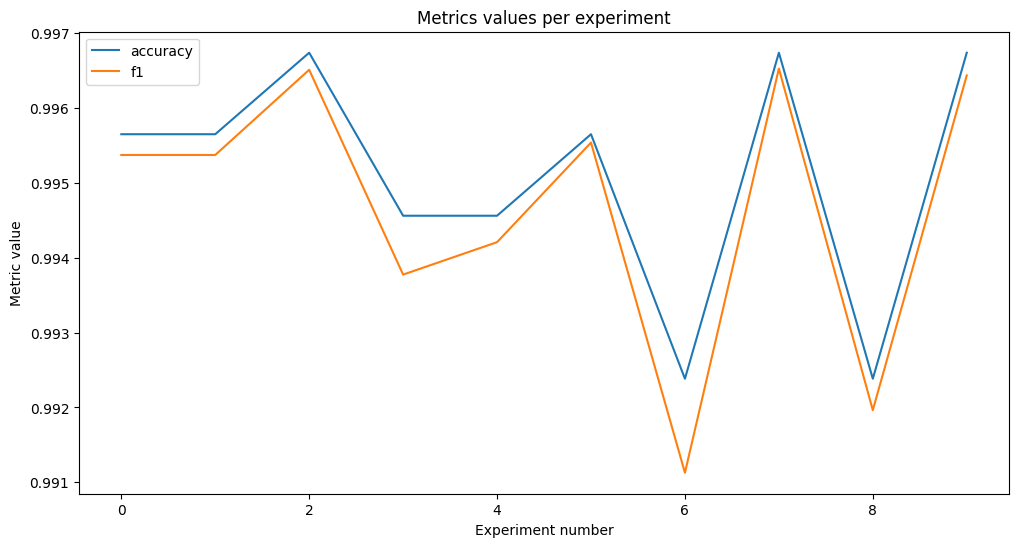

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(experiments_accuracies, label='accuracy')
plt.plot(experiments_f1s, label='f1')
plt.xlabel('Experiment number')
plt.ylabel('Metric value')
plt.title('Metrics values per experiment')
plt.legend()
plt.show()

In [137]:
print(f'Average accuracy: {np.mean(experiments_accuracies):.4f}')
print(f'Average f1: {np.mean(experiments_f1s):.4f}')

Average accuracy: 0.9951
Average f1: 0.9947


In [161]:
experiments_count = 10

experiments_accuracies_financial_model = []
experiments_f1s_financial_model = []

for i in tqdm(range(experiments_count)):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    ### training financial model ###
    extraTreesClassifier = ExtraTreesClassifier(random_state=fix_seed, criterion='gini', max_depth=None,
                                                min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

    train_indices = train_loader.dataset.indices
    X_train_financial = X_financial_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    extraTreesClassifier.fit(X_train_financial, y_train)
    
    extra_trees_classifier_path = './hybrid-model-search/extra-trees-classifier'
    with open(f'{extra_trees_classifier_path}/model-{i+1}-tmp.pkl','wb') as f:
        pickle.dump(extraTreesClassifier, f)
    
    ### testing financial model ###
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        extraTreesClassifier = pickle.load(f)

    test_indices = test_loader.dataset.indices
    X_test_financial = X_financial_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)
    
    y_pred = extraTreesClassifier.predict(X_test_financial)
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    experiments_accuracies_financial_model.append(accuracy)
    experiments_f1s_financial_model.append(f1)

100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


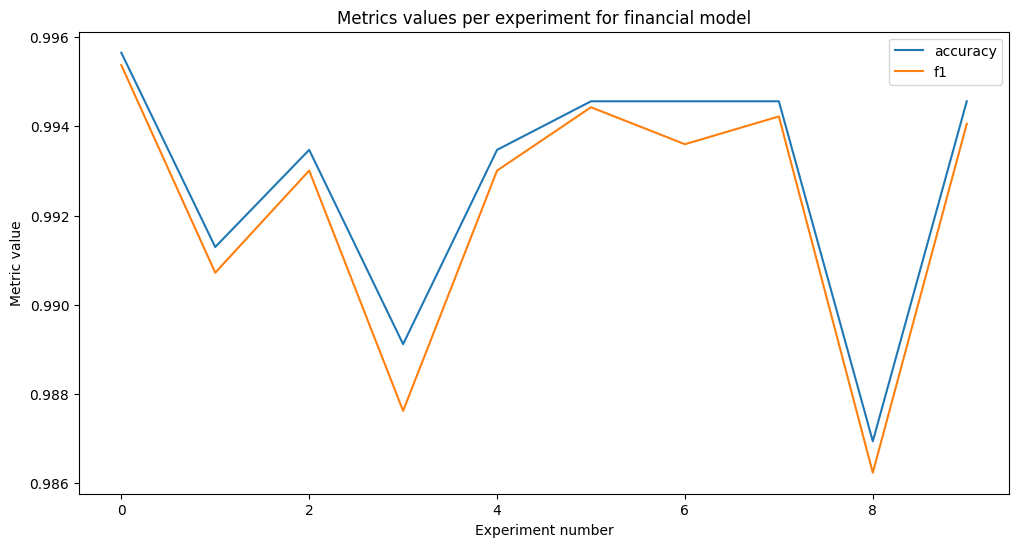

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(experiments_accuracies_financial_model, label='accuracy')
plt.plot(experiments_f1s_financial_model, label='f1')
plt.xlabel('Experiment number')
plt.ylabel('Metric value')
plt.title('Metrics values per experiment for financial model')
plt.legend()
plt.show()

In [163]:
print(f'Average accuracy: {np.mean(experiments_accuracies_financial_model):.4f}')
print(f'Average f1: {np.mean(experiments_f1s_financial_model):.4f}')

Average accuracy: 0.9928
Average f1: 0.9922


We obtain better result for using ensemble of models than using only financial model.

In [182]:
# improvements
print(f'Improvement in accuracy: {np.mean(experiments_accuracies) - np.mean(experiments_accuracies_financial_model):.4f}')
print(f'Improvement in f1: {np.mean(experiments_f1s) - np.mean(experiments_f1s_financial_model):.4f}')

Improvement in accuracy: 0.0023
Improvement in f1: 0.0025


Without standardisation:

Average accuracy: 0.9928
Average f1: 0.9922

### Experiment with sklearn MLPClassifier

In [29]:
import numpy as np
from sklearn.neural_network import MLPClassifier

experiments_count = 10

experiments_accuracies_textual_model = []
experiments_f1s_textual_model = []

for i in tqdm(range(experiments_count)):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', alpha=0.0001,
        batch_size=batch_size, learning_rate_init=0.001, max_iter=300, shuffle=False, random_state=fix_seed,
        tol=1e-4, verbose=False, warm_start=False, early_stopping=True, validation_fraction=0.1,
        beta_1=0.9, beta_2=0.999, epsilon=1e-8, n_iter_no_change=20
    )
    
    train_indices = train_loader.dataset.indices
    X_train_textual = X_textual_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    mlp_classifier.fit(X_train_textual, y_train)
    
    test_indices = test_loader.dataset.indices
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)
    
    y_pred = mlp_classifier.predict(X_test_textual)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    experiments_accuracies_textual_model.append(accuracy)
    experiments_f1s_textual_model.append(f1)
    
# print(f'Accuracy: {accuracy:.3f}')
# print(f'F1 Score: {f1:.3f}')

100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


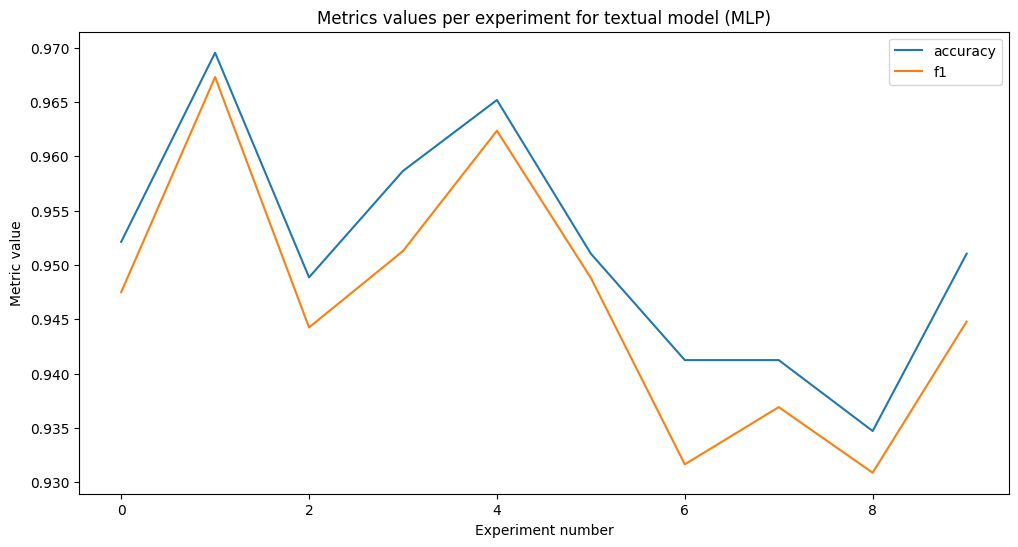

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(experiments_accuracies_textual_model, label='accuracy')
plt.plot(experiments_f1s_textual_model, label='f1')
plt.xlabel('Experiment number')
plt.ylabel('Metric value')
plt.title('Metrics values per experiment for textual model (MLP)')
plt.legend()
plt.show()

In [31]:
print(f'Average accuracy: {np.mean(experiments_accuracies_textual_model):.4f}')
print(f'Average f1: {np.mean(experiments_f1s_textual_model):.4f}')

Average accuracy: 0.9514
Average f1: 0.9466


Using default MLPClassifier obtains better results than the custom model.

Average accuracy: 0.9514
Average f1: 0.9466

### Testing different models on textual data

In [19]:
train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)

train_indices = train_loader.dataset.indices
X_train_textual = X_textual_tensor[train_indices]
y_train = y_tensor[train_indices].reshape(-1)

test_indices = test_loader.dataset.indices
X_test_textual = X_textual_tensor[test_indices]
y_test = y_tensor[test_indices].reshape(-1)

In [23]:
results = {}

experiment_count = 5

for i in range(experiment_count):
    classifiers = get_classifiers(random_state=fix_seed + i)
    
    for classifier in classifiers:
        classifier.fit(X_train_textual, y_train)
        y_pred = classifier.predict(X_test_textual)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        classifier_name = classifier.__class__.__name__
        if classifier_name not in results:
            results[classifier_name] = [[accuracy, f1]]
        else:
            results[classifier_name].append([accuracy, f1])
            
results_mean = {k: np.mean(v, axis=0) for k, v in results.items()}
results_mean = [[k] + v.tolist() for k, v in results_mean.items()]
results_df = pd.DataFrame(results_mean, columns=['classifier', 'accuracy', 'f1'])

C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\joblib\externals\loky\backend\cont

In [24]:
results_df

,classifier,accuracy,f1
0,RandomForestClassifier,0.954516,0.948746
1,GradientBoostingClassifier,0.957563,0.952955
2,AdaBoostClassifier,0.933624,0.926594
3,ExtraTreesClassifier,0.957018,0.951615
4,BaggingClassifier,0.942111,0.934827
5,LogisticRegression,0.956474,0.951338
6,SVC,0.936888,0.928040
7,DecisionTreeClassifier,0.885963,0.875748
8,KNeighborsClassifier,0.954298,0.950935
9,GaussianNB,0.939064,0.931707


In [27]:
results_df.sort_values(by=['accuracy', 'f1'], ascending=False).reset_index(drop=True).head(20)

,classifier,accuracy,f1
0,MLPClassifier,0.957671,0.952712
1,GradientBoostingClassifier,0.957563,0.952955
2,ExtraTreesClassifier,0.957018,0.951615
3,LogisticRegression,0.956474,0.951338
4,RandomForestClassifier,0.954516,0.948746
5,KNeighborsClassifier,0.954298,0.950935
6,BaggingClassifier,0.942111,0.934827
7,GaussianNB,0.939064,0.931707
8,SVC,0.936888,0.928040
9,AdaBoostClassifier,0.933624,0.926594


In [28]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train_textual, y_train)
accuracy = tpot.score(X_test_textual, y_test)
print(f"TPOTClassifier - Accuracy: {accuracy}")

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9521683367068354

Generation 2 - Current best internal CV score: 0.9531887427386152

Generation 3 - Current best internal CV score: 0.9531887427386152

Generation 4 - Current best internal CV score: 0.9538030752134288

Generation 5 - Current best internal CV score: 0.9617758198236588

Best pipeline: KNeighborsClassifier(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0), n_neighbors=3, p=1, weights=distance)


C:\Users\grzeg\PycharmProjects\bankruptcy-prophet-new\bankruptcy-prophet\.venv\Lib\site-packages\tpot\base.py:1164: SyntaxWarning: invalid escape sequence '\w'
  (m.start(), m.end()) for m in re.finditer(", [\w]+__", dirty_string)


AttributeError: 'Tensor' object has no attribute 'astype'

In [29]:
tpot.export('best_pipeline.py')

#### Testing best pipeline

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier

experiments_count = 12

experiments_accuracies_textual_model = []
experiments_f1s_textual_model = []

for i in tqdm(range(experiments_count)):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    exported_pipeline = make_pipeline(
        StackingEstimator(estimator=XGBClassifier(learning_rate=0.5, max_depth=9, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)),
        KNeighborsClassifier(n_neighbors=3, p=1, weights="distance")
    )
    
    train_indices = train_loader.dataset.indices
    X_train_textual = X_textual_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    exported_pipeline.fit(X_train_textual, y_train)
    
    test_indices = test_loader.dataset.indices
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)
    
    y_pred = exported_pipeline.predict(X_test_textual)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    experiments_accuracies_textual_model.append(accuracy)
    experiments_f1s_textual_model.append(f1)
    
# print(f'Accuracy: {accuracy:.3f}')
# print(f'F1 Score: {f1:.3f}')

100%|██████████| 12/12 [01:00<00:00,  5.07s/it]


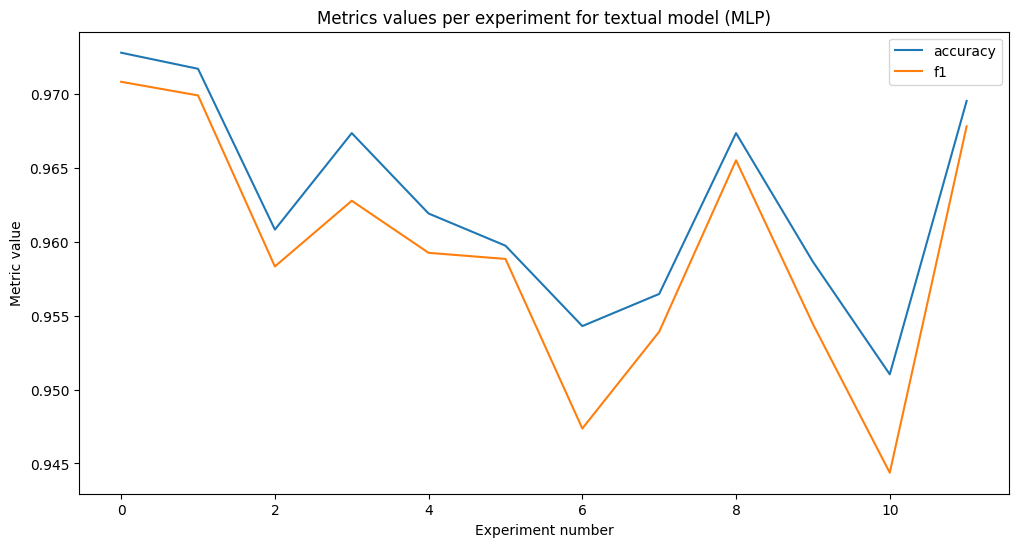

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(experiments_accuracies_textual_model, label='accuracy')
plt.plot(experiments_f1s_textual_model, label='f1')
plt.xlabel('Experiment number')
plt.ylabel('Metric value')
plt.title('Metrics values per experiment for textual model (MLP)')
plt.legend()
plt.show()

In [32]:
print(f'Average accuracy: {np.mean(experiments_accuracies_textual_model):.4f}')
print(f'Average f1: {np.mean(experiments_f1s_textual_model):.4f}')

Average accuracy: 0.9631
Average f1: 0.9601


new best results:
Average accuracy: 0.9631
Average f1: 0.9601

### Hybrid model with ExtraTreesClassifier and MLPClassifier

In [103]:
experiments_count = 10

experiments_accuracies = []
experiments_f1s = []

for i in tqdm(range(experiments_count)):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    ### training financial model ###
    extraTreesClassifier = ExtraTreesClassifier(random_state=fix_seed, criterion='gini', max_depth=None,
                                                min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

    train_indices = train_loader.dataset.indices
    X_train_financial = X_financial_tensor[train_indices]
    X_train_textual = X_textual_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    extraTreesClassifier.fit(X_train_financial, y_train)
    
    extra_trees_classifier_path = './hybrid-model-search/extra-trees-classifier'
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl','wb') as f:
        pickle.dump(extraTreesClassifier, f)
    
    ### training textual model ### 
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 16),
                                   batch_size=batch_size,
                                   max_iter=300,
                                   shuffle=False,
                                   random_state=fix_seed,
                                   early_stopping=True,
                                   beta_2=0.99,
                                   n_iter_no_change=20
    )

    mlp_classifier.fit(X_train_textual, y_train)

    mlp_classifier_path = './hybrid-model-search/mlp-classifier'
    with open(f'{mlp_classifier_path}/model-{i+1}.pkl','wb') as f:
        pickle.dump(mlp_classifier, f)
    
    # testing hybrid model
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        extraTreesClassifier = pickle.load(f)

    with open(f'{mlp_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        mlp_classifier = pickle.load(f)
    
    models_weights = {
        'financial': 0.72,
        'textual': 0.28
    }

    test_indices = test_loader.dataset.indices
    X_test_financial = X_financial_tensor[test_indices]
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)

    financial_outputs = extraTreesClassifier.predict_proba(X_test_financial)
    textual_outputs = mlp_classifier.predict_proba(X_test_textual)
    
    financial_outputs = models_weights['financial'] * financial_outputs
    textual_outputs = models_weights['textual'] * textual_outputs
    
    outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
    predicted_label = np.argmax(outputs, axis=1)
    
    accuracy = accuracy_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)
    
    experiments_accuracies.append(accuracy)
    experiments_f1s.append(f1)

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


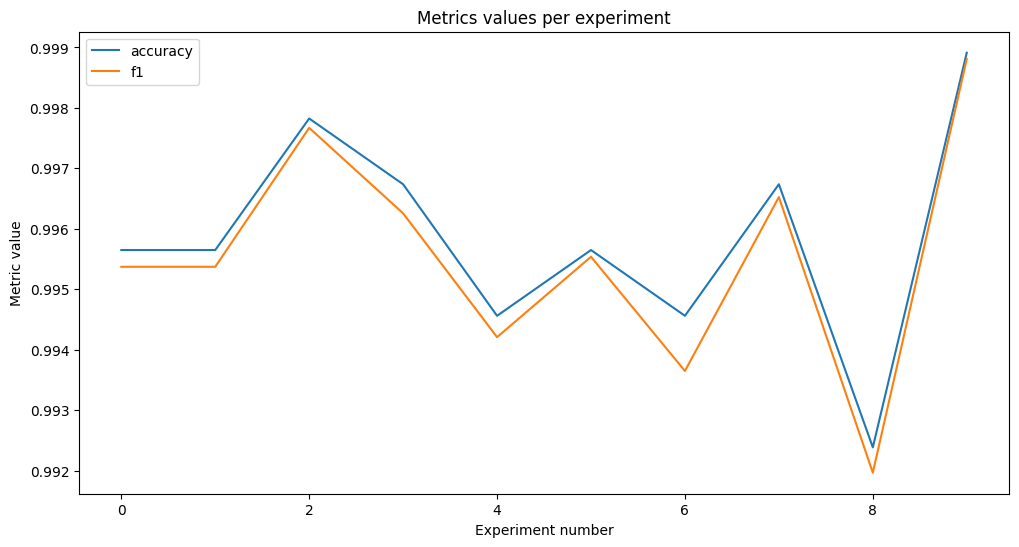

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(experiments_accuracies, label='accuracy')
plt.plot(experiments_f1s, label='f1')
plt.xlabel('Experiment number')
plt.ylabel('Metric value')
plt.title('Metrics values per experiment')
plt.legend()
plt.show()

In [105]:
print(f'Average accuracy: {np.mean(experiments_accuracies):.4f}')
print(f'Average f1: {np.mean(experiments_f1s):.4f}')

Average accuracy: 0.9959
Average f1: 0.9955


Hybrid model with ExtraTreesClassifier and MLPClassifier obtains better results than using custom models.

Average accuracy: 0.9959
Average f1: 0.9955

#### Repeating process of looking best model weights

In [85]:
models_weights_configuration = {
    'financial': np.linspace(0.3, 0.9, 61),
    'textual': np.linspace(0.7, 0.1, 61)
}

models_weights_configuration

{'financial': array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
        0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
        0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
        0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
        0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
        0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ]),
 'textual': array([0.7 , 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 ,
        0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49,
        0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38,
        0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27,
        0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16,
        0.15, 0.14, 0.13, 0.12, 0.11, 0.1 ])}

In [86]:
accuracies = []
f1s = []
for i, (financial_model_weight, textual_model_weight) in tqdm(enumerate(zip(models_weights_configuration['financial'], models_weights_configuration['textual']))):
    
    fix_seed = 2024 + i
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
    
    ### training financial model ###
    extraTreesClassifier = ExtraTreesClassifier(random_state=fix_seed, criterion='gini', max_depth=None,
                                                min_samples_leaf=1, min_samples_split=2, n_estimators=100, max_features='sqrt')

    train_indices = train_loader.dataset.indices
    X_train_financial = X_financial_tensor[train_indices]
    X_train_textual = X_textual_tensor[train_indices]
    y_train = y_tensor[train_indices].reshape(-1)
    
    extraTreesClassifier.fit(X_train_financial, y_train)

    ### training textual model ### 
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 16),
                                   batch_size=batch_size,
                                   max_iter=300,
                                   shuffle=False,
                                   random_state=fix_seed,
                                   early_stopping=True,
                                   beta_2=0.99,
                                   n_iter_no_change=20
    )

    mlp_classifier.fit(X_train_textual, y_train)

    # testing hybrid model
    test_indices = test_loader.dataset.indices
    X_test_financial = X_financial_tensor[test_indices]
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)

    financial_outputs = extraTreesClassifier.predict_proba(X_test_financial)
    textual_outputs = mlp_classifier.predict_proba(X_test_textual)
    
    financial_outputs = financial_model_weight * financial_outputs
    textual_outputs = textual_model_weight * textual_outputs
    
    outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
    predicted_label = np.argmax(outputs, axis=1)
    
    accuracy = accuracy_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)
    
    accuracies.append(accuracy)
    f1s.append(f1)

61it [01:35,  1.57s/it]


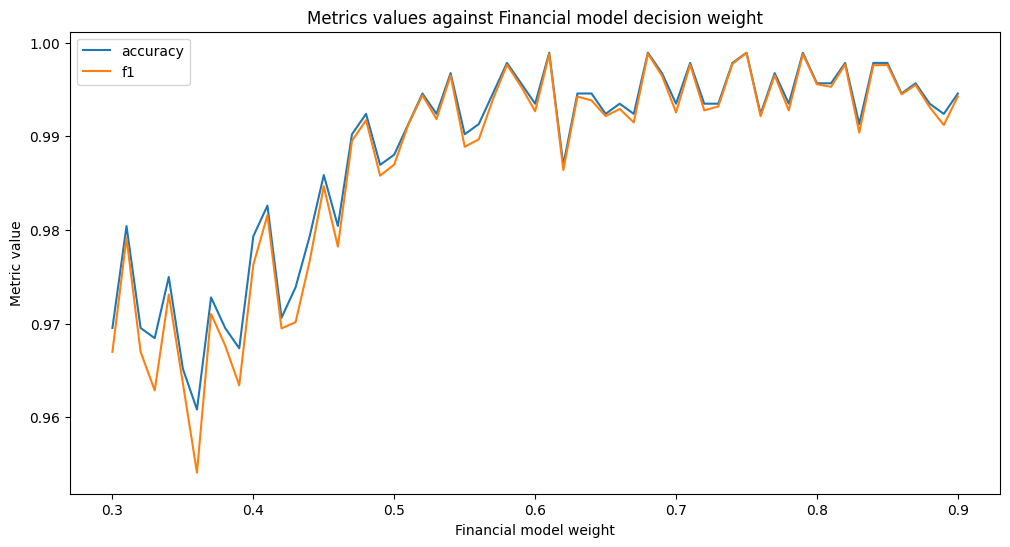

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(models_weights_configuration['financial'], accuracies, label='accuracy')
plt.plot(models_weights_configuration['financial'], f1s, label='f1')
plt.xlabel('Financial model weight')
plt.ylabel('Metric value')
plt.title('Metrics values against Financial model decision weight')
plt.legend()
plt.show()

### Save best models

In [ ]:
# pick best saved models regarding test accuracy
best_experiment = np.argmax(experiments_accuracies)
best_experiment

In [97]:
# load best models

accuracies = []
f1s = []

    
models_weights = {
    'financial': 0.72,
    'textual': 0.28
}

for i in tqdm(range(experiments_count)):
       
    with open(f'{extra_trees_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        extraTreesClassifier = pickle.load(f)
        
    with open(f'{mlp_classifier_path}/model-{i+1}.pkl', 'rb') as f:
        mlp_classifier = pickle.load(f)
    
    test_indices = test_loader.dataset.indices
    X_test_financial = X_financial_tensor[test_indices]
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)

    financial_outputs = extraTreesClassifier.predict_proba(X_test_financial)
    textual_outputs = mlp_classifier.predict_proba(X_test_textual)
    
    financial_outputs = models_weights['financial'] * financial_outputs
    textual_outputs = models_weights['textual'] * textual_outputs
    
    outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
    predicted_label = np.argmax(outputs, axis=1)
    
    accuracy = accuracy_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)
    
    accuracies.append(accuracy)
    f1s.append(f1)

100%|██████████| 10/10 [00:00<00:00, 35.52it/s]


In [111]:
best_experiment = np.argmax(accuracies)

with open(f'{extra_trees_classifier_path}/model-{best_experiment+1}.pkl', 'rb') as f:
    extraTreesClassifier = pickle.load(f)
    
with open(f'{mlp_classifier_path}/model-{best_experiment+1}.pkl', 'rb') as f:
    mlp_classifier = pickle.load(f)
    
accuracies = []
f1s = []

experiments_count = 20
for i in tqdm(range(experiments_count)):
    fix_seed = 2024 + 1
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)
    
    train_loader, val_loader, test_loader = get_train_val_test_loaders(combined_dataset, batch_size)
        
    test_indices = test_loader.dataset.indices
    X_test_financial = X_financial_tensor[test_indices]
    X_test_textual = X_textual_tensor[test_indices]
    y_test = y_tensor[test_indices].reshape(-1)
    
    financial_outputs = extraTreesClassifier.predict_proba(X_test_financial)
    textual_outputs = mlp_classifier.predict_proba(X_test_textual)
    
    financial_outputs = models_weights['financial'] * financial_outputs
    textual_outputs = models_weights['textual'] * textual_outputs
    
    outputs = np.sum(np.stack([financial_outputs, textual_outputs], 1), axis=1)
    predicted_label = np.argmax(outputs, axis=1)
    
    accuracy = accuracy_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)

    accuracies.append(accuracy)
    f1s.append(f1)

100%|██████████| 20/20 [00:00<00:00, 48.84it/s]


In [112]:
print(f'Average accuracy: {np.mean(accuracies):.4f}')
print(f'Average f1: {np.mean(f1s):.4f}')

Average accuracy: 0.9989
Average f1: 0.9988


Picking best models and testing on 10 random seeds gives best results: 
Average accuracy: 0.9989
Average f1: 0.9988

### Create a pipeline for the hybrid model

### Explain model behaviour ?